# Introduction

I wanted to revise what i've learnt so far when dealing with numpy... So i've started to create a cheat-sheet. Most of what you'll find below is taken from Khalil El Mahrsi's course that you can find on his website [smellydatascience.com](https://smellydatascience.com/teaching/python-for-data-science-2021/02-numpy.html) published under the [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International Public License (CC BY-NC-SA 4.0)](https://creativecommons.org/licenses/by-nc-sa/4.0/). So all the credits goes to him. I've added few tips found here and there... 

I've also found a great [Visual Intro to NumPy and Data Representation
](https://jalammar.github.io/visual-numpy/) by Jay Alammar that is really interesting ! so let's begin 

Let's begin :)

__What is NumPy?__  

A fundamental Python package for scientific computation

__Which Python data science packages reliy on NumPy?__

Many, among others: pandas, scikit-learn, matplotlib...

__What do NumPy provide?__
- An object type (the ndarray) for representing multidimensional arrays (vectors, matrices, tensors, ...)
- Optimized routines and array operations
- Shape manipulation (indexing and slicing, reshaping, ...)
- Linear algebra and mathematical operations
- Statistics
- Random simulation
- Discrete Fourier transforms

## Installing & importing Numpy

In [ ]:
conda install numpy
pip install numpy

In [2]:
import numpy as np
np.__version__

'1.20.1'

Asking For Help

In [45]:
np.info(np.ndarray.dtype)

Data-type of the array's elements.

Parameters
----------
None

Returns
-------
d : numpy dtype object

See Also
--------
numpy.dtype

Examples
--------
>>> x
array([[0, 1],
       [2, 3]])
>>> x.dtype
dtype('int32')
>>> type(x.dtype)
<type 'numpy.dtype'>


Create an array from a list

In [7]:
a = np.array([10, 9, 8, 7, 6, 5])
a

array([10,  9,  8,  7,  6,  5])

In [8]:
type(a)

numpy.ndarray

np arrays are subscriptable

In [9]:
a[2]

8

slicing is also supported

In [10]:
a[1::2]

array([9, 7, 5])

In [11]:
a[:2]

array([10,  9])

np arrays are mutable

In [12]:
a[3] = 1000
a

array([  10,    9,    8, 1000,    6,    5])

__Why Not Just Use Lists?__  
Lists are general-purpose sequences.
- Efficient when it comes to insertions, deletions, appending, ...
- No support for vectorized operations (e.g., element-wise addition or multiplication)
- Mixed types → must store type info for every item 

NumPy arrays are (way) more efficient
- Fixed type (i.e., all elements of an array have the same type)
    - Less in-memory space  
    - No type checking when iterating  
- Use contiguous memory → faster access and better caching
- Relies on highly-optimized compiled C code
- Support of vectorization and broadcasting

np.int64   
np.float32   
np.complex   
np.bool      
np.object    
np.string_   
np.unicode_   

## NumPy Arrays vs. Lists

In [13]:
l1, l2 = [0, 1, 2, 3], [4, 5, 6, 7]
a1, a2 = np.array(l1), np.array(l2)
l1 + l2

[0, 1, 2, 3, 4, 5, 6, 7]

adding two np arrays results in...  
elt-wise addition :

In [14]:
a1 + a2

array([ 4,  6,  8, 10])

the * results in list replication  
...but results in elt-wise multiplication for ndarrays

In [3]:
l1, l2 = [0, 1, 2, 3], [4, 5, 6, 7]
a1, a2 = np.array(l1), np.array(l2)

In [4]:
3 * l1

[0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]

In [5]:
3 * a1

array([0, 3, 6, 9])

trying to multiply lists raises an exception...  
...but is supported for ndarrays

In [17]:
l1 * l2

TypeError: can't multiply sequence by non-int of type 'list'

In [18]:
a1 * a2

array([ 0,  5, 12, 21])

__What make NumPy significantly faster than built-in Python lists?__  
Vectorization, fixed types, compiled C implementations, etc...

In [20]:
l = list(range(10000))
a = np.array(l)

In [21]:
%%timeit -n 10000 -r 10
sum([2 * i for i in l])

975 µs ± 28.6 µs per loop (mean ± std. dev. of 10 runs, 10000 loops each)


In [22]:
%%timeit -n 10000 -r 10
(2 * a).sum()

21.1 µs ± 1.26 µs per loop (mean ± std. dev. of 10 runs, 10000 loops each)


# NumPy Array Basics

![title](1.png)   
Attributes of interest:
- shape
- ndim
- dtype
- itemsize
- nbytes

number of dimensions

In [45]:
a = np.array([0, 1, 2, 3, 4])    
a.ndim

1

shape (length along each dimension)

In [46]:
a.shape

(5,)

data type

In [35]:
a.dtype

dtype('int32')

itmen size in bytes

In [37]:
a.itemsize

4

total memory size in bytes

In [39]:
a.nbytes

20

positional indexing works the same as lists

In [41]:
a[1]

1

same goes for slicing

In [9]:
a = np.array([0, 1, 2, 3, 4])    
a.dtype

dtype('int32')

arrays are mutable but beware of type coercion!

In [10]:
a[4] = 12.5
a

array([ 0,  1,  2,  3, 12])

In [11]:
a.dtype

dtype('int32')

## Multi-Dimensional Arrays

For the sake of simplification, examples shown here use two-dimensional arrays. The principles remains the same for arrays of higher dimensions.
![title](2.png)

In [12]:
b = np.array([
    [0, 1, 2, 3, 4],  # 1st row
    [0, 1, 2, 3, 4]], # 2nd row
    # type eventually specified
    dtype=np.int16)

In [36]:
b.dtype

dtype('int16')

In [38]:
b.itemsize

2

In [40]:
b.nbytes

20

For 3D arrays:
![title](21.png)

## Basic Array Indexing
NumPy's basic array indexing and slicing are extensions of Python's indexing and slicing to N dimensions
- One slice or index per dimension
- Separated by a comma (,)   

Similar rules apply to omitted parts of a slice
- d_i_start omitted → 0
- d_i_end omitted → array.shape[i]
- d_i_step omitted → 1   

If a dimension is to be fully retained, use a colon (:) as the corresponding slice

Syntax (indexing)   
array[i, j, ...]

Syntax (slicing)  
array[d_0_start: d_0_end: d_1_step, d_1_start: d_1_end: d_1_step, ...]


## Basic Array Indexing

Access a single item
![title](3.png)

In [29]:
d = np.array([
    [0, 1, 2, 3, 4],
    [5, 6, 7, 8, 9]])
d[1, 2]

7

Access a whole row

![title](4.png)

In [30]:
d[0, :] # d[0]

array([0, 1, 2, 3, 4])

Asscess a whole column

![title](5.png)

In [31]:
d[:, 3]

array([3, 8])

![title](6.png)

In [32]:
d[:, :3]

array([[0, 1, 2],
       [5, 6, 7]])

![title](7.png)

In [33]:
d[1, 2:]

array([7, 8, 9])

![title](8.png)

In [34]:
d[:, 1::2]

array([[1, 3],
       [6, 8]])

In [35]:
d[:, [1, 3]]

array([[1, 3],
       [6, 8]])

## Array Content Modification
- NumPy arrays are mutable   
- Indexing and slicing can be used in assignment statements to modify items
- Values are coerced to the array's data type (e.g., the decimal part of a float will be truncated when it is inserted in an array of integers)

![title](9.png)

In [36]:
e = np.array([
    [0, 1, 2, 3, 4],
    [5, 6, 7, 8, 9]])

e[1, 2] = 12.9
e

array([[ 0,  1,  2,  3,  4],
       [ 5,  6, 12,  8,  9]])

Modify multiple items through slicing

![title](10.png)

In [37]:
d[0, 2:] = [-2, 42, -1]
d

array([[ 0,  1, -2, 42, -1],
       [ 5,  6,  7,  8,  9]])

Modify multiple items through slicing (with broadcasting)


![title](11.png)

In [38]:
d[:, ::2] = [7, 13, 18]
d

array([[ 7,  1, 13, 42, 18],
       [ 7,  6, 13,  8, 18]])

Modify multiple items through boolean filtering (will be presented later)

![title](12.png)

In [39]:
d[d >= 13] = -3
d

array([[ 7,  1, -3, -3, -3],
       [ 7,  6, -3,  8, -3]])

Returns copy with values appended. NOT in-place

In [68]:
x = np.array([0,1,2,3,4])
y = np.append(x, [5,6,7,8,9])
x

array([0, 1, 2, 3, 4])

In [69]:
y

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

When dealing with arrays with higher dimensions, we use : for selecting the whole indices along each axis. We can also use … can select all indices across multiple axes. The exact number of axes expanded is inferred.

In [13]:
arr = np.array(range(30)).reshape(2, 5, -1)
arr

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]],

       [[15, 16, 17],
        [18, 19, 20],
        [21, 22, 23],
        [24, 25, 26],
        [27, 28, 29]]])

In [ ]:
c[1, ...] #Same as [1, :, :]

In [14]:
arr[..., 2]

array([[ 2,  5,  8, 11, 14],
       [17, 20, 23, 26, 29]])

Insert an item in an array

In [61]:
a = np.arange(5)
np.insert(a, 1, 100)

array([  0, 100,   1,   2,   3,   4])

Delete an item in an array

In [13]:
a = np.arange(5)[: :-1]
a

array([4, 3, 2, 1, 0])

In [14]:
np.delete(a, 2)

array([4, 3, 1, 0])

# Arithmetic Operations and Basic Math
- NumPy arrays support a wide range of element-wise arithmetic operations (sum, substraction, multiplication, ...)
- NumPy also provides a wide range of mathematical functions
    - Trigonometric and hyperbolic functions
    - Sums, products, and differences over axes
    - Logarithms and exponents
    - ...
    
Most array operations can be vectorized. Do not use for loops unless it is absolutely necessary (very rare)!

element-wise sum of 2 arrays

In [40]:
a = np.array([0, 1, 2])
b = np.array([3, 4, 5])
a + b

array([3, 5, 7])

element-wise product

In [42]:
a = np.array([0, 1, 2])
b = np.array([3, 4, 5])
a * b * b

array([ 0, 16, 50])

element-wise power

In [44]:
a = np.array([0, 1, 2])
b = np.array([3, 4, 5])
a ** b

array([ 0,  1, 32], dtype=int32)

trigonometric functions (sin, cos, tan)

In [47]:
a = np.array([0, 1, 3.14/2])
np.sin(a)

array([0.        , 0.84147098, 0.99999968])

hyperbolic functions (sinh, cosh, tanh)

In [48]:
a = np.array([0, 1, 3.14/2])
np.tanh(a)

array([0.        , 0.76159416, 0.91702576])

log and exponential functions

In [50]:
a = np.array([1, 10, 100])
np.log(a)

array([0.        , 2.30258509, 4.60517019])

sum all the matrix's elements

In [51]:
m = np.array([
    [0, 1, 2, 3, 4],
    [5, 6, 7, 8, 9]])

np.sum(m)

45

sum along the rows

In [53]:
m = np.array([
    [0, 1, 2, 3, 4],
    [5, 6, 7, 8, 9]])

np.sum(m, axis = 0)

array([ 5,  7,  9, 11, 13])

sum  along the columns

In [54]:
m = np.array([
    [0, 1, 2, 3, 4],
    [5, 6, 7, 8, 9]])

np.sum(m, axis = 1)

array([10, 35])

difference along the columns

In [58]:
m = np.array([
    [0, 1, 2, 3, 4],
    [5, 6, 7, 8, 9]])

np.diff(m, axis=1)

array([[1, 1, 1, 1],
       [1, 1, 1, 1]])

product along the rows

In [56]:
m = np.array([
    [0, 1, 2, 3, 4],
    [5, 6, 7, 8, 9]])

np.prod(m, axis=0)

array([ 0,  6, 14, 24, 36])

Element-wise comparison between 2 arrays

In [46]:
a = np.array([1, 2, 3])
b = np.array([0, 2, 0])
a == b

array([False,  True, False])

Array-wise comparison

In [49]:
np.array_equal(a, b)

False

Element-wise comparison

In [48]:
a = np.array([1, 2, 3])
a < 2

array([ True, False, False])

## Broadcasting
- Broadcasting designates how NumPy conducts arithmetic operations on arrays with different shapes
- If the arrays have compatible dimensions
    - The smaller array is “replicated” to match the bigger array's dimensions
    - The operation is conducted element-wise as usual
- If the arrays have incompatible dimensions, a ValueError is raised
- Dimensions are compatible if
    - They are equal, or
    - One of them is 1


Broadcasting a scalar
![title](13.png)

In [4]:
a = np.array([[0, 1, 2], 
             [3, 4, 5]])
a + 10

array([[10, 11, 12],
       [13, 14, 15]])

Broadcasting a row
![title](14.png)

In [5]:
a = np.array([[0, 1, 2], 
             [3, 4, 5]])
b = np.array([10, 20, 30])
a + b

array([[10, 21, 32],
       [13, 24, 35]])

Broadcasting a colum
![title](15.png)

In [7]:
a = np.array([[0, 1, 2], 
             [3, 4, 5]])
b = np.array([[10], [100]])
a + b

array([[ 10,  11,  12],
       [103, 104, 105]])

## Array Creation Routines

NumPy provides useful [routines for creating arrays (filled with constant values, from numeric ranges, ...)](https://numpy.org/doc/stable/reference/routines.array-creation.html)
![title](16.png)

In [8]:
np.zeros((3, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [9]:
np.ones((3, 2), dtype=np.int32)

array([[1, 1],
       [1, 1],
       [1, 1]])

In [10]:
np.full([2, 3], 42)

array([[42, 42, 42],
       [42, 42, 42]])

In [15]:
a = np.array([[0, 1], [3, 4]])
a

array([[0, 1],
       [3, 4]])

In [16]:
np.full_like(a, 66, dtype=np.float16)

array([[66., 66.],
       [66., 66.]], dtype=float16)

In [13]:
# same as np.eye(4)
np.identity(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

Create an empty array

In [44]:
np.empty((3,2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [62]:
np.diag(np.arange(4))

array([[0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3]])

creates an array from start to stop in step.  
np.arange(start, stop, step)

In [14]:
np.arange(0, 1.1, 0.25)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

given an array containing some numbers and a range, limit the numbers to that range.  
For numbers outside the range, it returns the edge value.

In [17]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
np.clip(a, 3, 5)

array([3, 3, 3, 3, 4, 5, 5, 5, 5, 5])

return an array with the evenly spaced numbers from strat to stop  
np.linespace(start, stop, num) 

In [15]:
np.linspace(0, 20, 5)

array([ 0.,  5., 10., 15., 20.])

It is convenient to draw math function:

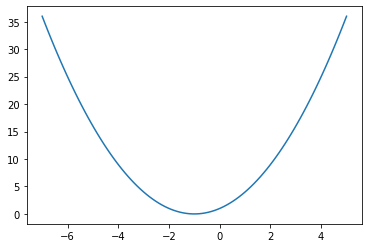

In [42]:
import matplotlib.pyplot as plt

def f(x): return x**2 + 2*x + 1

x = np.linspace(-7, 5, 100)
plt.plot(x, f(x))
plt.show()

In [16]:
np.logspace(1, 5, num=3)

array([1.e+01, 1.e+03, 1.e+05])

In [17]:
np.geomspace(1, 1000, 4)

array([   1.,   10.,  100., 1000.])

## Random Number Generation Routines
NumPy provides useful [random number generation and sampling routines](https://numpy.org/doc/stable/reference/random/index.html)
![title](17.png)
*These are the legacy operations that you will see the most in code examples. NumPy also provides updated routines (recommended)

** __distribution__ is to be replaced by the distribution's name

generates random numbers uniformly distributed between 0 to 1 in a given shape.  
rand() 

In [43]:
np.random.rand(5)

array([0.28977318, 0.36827695, 0.43480548, 0.62994031, 0.90077232])

In [20]:
# fix seed
np.random.seed(42)
np.random.rand(3, 2)

array([[0.37454012, 0.95071431],
       [0.73199394, 0.59865848],
       [0.15601864, 0.15599452]])

generates an array (size=size) of random integers in the range (low — high).  
randint(low, high, size) 

In [21]:
np.random.seed(42)
np.random.randint(20, 100, size=5)

array([71, 34, 91, 80, 40])

randomly choose samples from a given array. It is also possible to pass a probability.  
random.choice()

In [46]:
x = [0, 1, 2, 3, 4, 5]
np.random.choice(x, 10)

array([0, 0, 0, 4, 2, 1, 4, 3, 1, 3])

In [22]:
a = np.arange(10)
np.random.seed(42)

# default w/replacement
np.random.choice(a, size=5)

array([6, 3, 7, 4, 6])

In [23]:
np.random.seed(42)
np.random.binomial(n=1, p=0.5, size=10)

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1])

generates random numbers in a normal distribution.  
randn() 

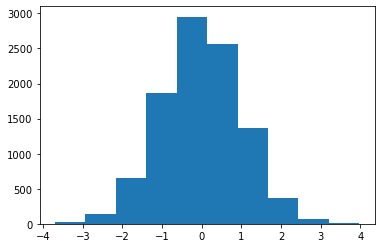

In [45]:
plt.hist(np.random.randn(10000))
plt.show()

## Linear Algebra
NumPy provides [optimized implementations of linear algebra functions](https://numpy.org/doc/stable/reference/routines.linalg.html)
![title](18.png)


In [25]:
a = np.array([0, 1, 2])
b = np.array([3, 4, 5])
np.dot(a, b)
# equivalent to np.sum(a * b)

14

dot product (or more generally matrix multiplication) is done with a function

In [26]:
a = np.array([[0, 1, 2], [3, 4, 5]])
b = np.array([[0, 1], [1, 1], [1, 0]])
np.dot(a, b)

array([[3, 1],
       [9, 7]])

In Python 3.5, the @ operator was added as an infix operator for matrix multiplication

In [63]:
x = np.diag(np.arange(4))
x@x

array([[0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 4, 0],
       [0, 0, 0, 9]])

In [28]:
a = np.array([[0, 1, 2],
              [3, 4, 5],
              [7, 8, 9]])

np.trace(a)

13

In [4]:
a = np.array([1, 2, 3])
# equivalent: np.sqrt(np.dot(a, a))
np.linalg.norm(a)

3.7416573867739413

In [6]:
a = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

# matrix's Frobenius norm
np.linalg.norm(a)

16.881943016134134

In [7]:
a = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

# matrix's Frobenius norm
np.linalg.matrix_power(a, 3)

array([[ 468,  576,  684],
       [1062, 1305, 1548],
       [1656, 2034, 2412]])

In [19]:
a = np.arange(9).reshape(3, -1)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [20]:
# same as a.T
np.transpose(a)

array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])

## Statistics
NumPy provides multiple [routines for statistics](https://numpy.org/doc/stable/reference/routines.statistics.html)
![title](19.png)

In [12]:
a = np.array([[1, 4, -3],
              [0, 7, 2],
              [9, 3, 4]])

np.mean(a)

3.0

In [10]:
a = np.array([[1, 4],
              [0, 7],
              [9, 3]])

np.mean(a, axis=1)

array([2.5, 3.5, 6. ])

In [11]:
a = np.array([[1, 4, -3],
              [0, 7, 2],
              [9, 3, 4]])

np.median(a, axis=1)

array([1., 2., 4.])

In [13]:
a = np.array([[1, 4, -3],
              [0, 7, 2],
              [9, 3, 4]])

# np.max(a, axis=0) also works
np.amax(a, axis=0)

array([9, 7, 4])

In [14]:
a = np.array([[1, 4, -3],
              [0, 7, 2],
              [9, 3, 4]])

np.min(a, axis=1)

array([-3,  0,  3])

returns the indices of the max values along an axis.  
useful in object classification and detection to find the object with the highest probability.  
There are also similar functions like argmin() , argwhere() , argpartition()

In [15]:
a = np.array([[1, 4, -3],
              [0, 7, 2],
              [9, 3, 4]])

# index of min along each col
np.argmin(a, axis=1)

array([2, 0, 1], dtype=int64)

For an array arr, np.argmax(arr), np.argmin(arr), and np.argwhere(condition(arr)) return the indices of maximum values, minimum values, and values that satisfy a user-defined condition respectively. While these arg functions are widely used, we often overlook the function np.argsort() that returns the indices that would sort an array.
   
We can use np.argsort to sort values of arrays according to another array. Here is an example of sorting student names using their exam scores. The sorted name array can also be transformed back to its original order using np.argsort(np.argsort(score)).

In [4]:
score = np.array([70, 60, 50, 10, 90, 40, 80])
name = np.array(['Ada', 'Ben', 'Charlie', 'Danny', 'Eden', 'Fanny', 'George'])

# # an array of names in ascending order of their scores
sorted_names = name[np.argsort(score)]
sorted_names

array(['Danny', 'Fanny', 'Charlie', 'Ben', 'Ada', 'George', 'Eden'],
      dtype='<U7')

In [6]:
sorted_names[np.argsort(np.argsort(score))]

array(['Ada', 'Ben', 'Charlie', 'Danny', 'Eden', 'Fanny', 'George'],
      dtype='<U7')

## Reshaping Arrays
[Array manipulation routines](https://numpy.org/doc/stable/reference/routines.array-manipulation.html) can be used to change array shapes, join arrays, ...
![title](20.png)

reshape a multidimensional array to 1D array  
flatten a into a 1-D array

In [20]:
a = np.array([[0, 1, 2], [3, 4, 5]])
a

array([[0, 1, 2],
       [3, 4, 5]])

In [21]:
a.flatten()

array([0, 1, 2, 3, 4, 5])

In [21]:
a = np.array([[0, 1, 2], [3, 4, 5]])
a

array([[0, 1, 2],
       [3, 4, 5]])

reshape the array

In [22]:
a.reshape(3, 2)

array([[0, 1],
       [2, 3],
       [4, 5]])

we can use -1 , numpy calculates the dimension for you.

In [58]:
a = np.array([0, 1, 2, 3, 4, 5])

a.reshape((2, -1))

array([[0, 1, 2],
       [3, 4, 5]])

stack arrays horizontally   
(arrays are provided as tuples)

In [23]:
a = np.array([[0, 1, 2], [3, 4, 5]])
b = np.array([[0, 10, 20], [30, 40, 50]])
a

array([[0, 1, 2],
       [3, 4, 5]])

In [24]:
b

array([[ 0, 10, 20],
       [30, 40, 50]])

In [25]:
np.hstack((a, b))

array([[ 0,  1,  2,  0, 10, 20],
       [ 3,  4,  5, 30, 40, 50]])

stack arrays horizontally   
(arrays are provided as tuples)

In [26]:
a = np.array([[0, 1, 2], [3, 4, 5]])
a

array([[0, 1, 2],
       [3, 4, 5]])

In [27]:
b = np.array([[0, 10, 20], [30, 40, 50]])
b

array([[ 0, 10, 20],
       [30, 40, 50]])

In [28]:
np.vstack((a, b))

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 0, 10, 20],
       [30, 40, 50]])

split array vertically into 4 arrays

In [29]:
a = np.array([[0, 1, 2], [3, 4, 5]])
a

array([[0, 1, 2],
       [3, 4, 5]])

In [30]:
b = np.array([[0, 10, 20], [30, 40, 50]])
b

array([[ 0, 10, 20],
       [30, 40, 50]])

In [31]:
c = np.vstack((a, b))
c

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 0, 10, 20],
       [30, 40, 50]])

In [32]:
np.vsplit(c, 4)

[array([[0, 1, 2]]),
 array([[3, 4, 5]]),
 array([[ 0, 10, 20]]),
 array([[30, 40, 50]])]

how to insert a new axis at a user-defined axis position ?  

with np.newaxis, this operation expands the shape of an array by one unit of dimension. While this can also be done by np.expand_dims(), using np.newaxis is much more readable and arguably more elegant

In [40]:
arr = np.array(range(1000)).reshape(2,5,4,-1)
arr.shape

(2, 5, 4, 25)

In [42]:
arr[..., np.newaxis, :, :, :].shape

(2, 1, 5, 4, 25)

Remove single-dimensional entries from the shape of an array

In [35]:
x = np.array([[[0], [1], [2]]])
x

array([[[0],
        [1],
        [2]]])

In [36]:
np.squeeze(x)

array([0, 1, 2])

In [37]:
np.squeeze(x, axis=0)

array([[0],
       [1],
       [2]])

## Advanced Indexing
In addition to standard (basic) Python indexing, NumPy supports a more advanced indexing syntax
- Using integer array indexing
- With boolean “masking”

an example of advanced integer array indexing

In [34]:
a = np.array([
    [-2, 50, 23, 30],
    [42, -7, -8, 11],
    [40, 20, 15, 17]
])

a[[0, 2, 1], [2, 1, 1]]

array([23, 20, -7])

positions to retain on each row using the a boolean ndarray to mask / filter values

In [35]:
a = np.array([
    [-2, 50, 23, 30],
    [42, -7, -8, 11],
    [40, 20, 15, 17]
])

filter = np.array([
    [False, False, False, True ],
    [True,  True,  True,  False],
    [False, True,  False, True ]
])

a [filter]

array([30, 42, -7, -8, 20, 17])

conducts elt-wise truth value testing -> result used as filter

In [36]:
a = np.array([
    [-2, 50, 23, 30],
    [42, -7, -8, 11],
    [40, 20, 15, 17]
])

a[a < 0]

array([-2, -7, -8])

boolean ndarrays can be combined with & (and) and | (or)

In [38]:
a = np.array([
    [-2, 50, 23, 30],
    [42, -7, -8, 11],
    [40, 20, 15, 17]
])

a[(a > 10) & (a < 40)]

array([23, 30, 11, 20, 15, 17])

In [39]:
a[(a < 0) | (a > 40)]

array([-2, 50, 42, -7, -8])

advanced indexes can be used to modify elts

In [40]:
a = np.array([
    [-2, 50, 23, 30],
    [42, -7, -8, 11],
    [40, 20, 15, 17]
])

a[(a < 0) | (a > 40)] = 99
a

array([[99, 99, 23, 30],
       [99, 99, 99, 11],
       [40, 20, 15, 17]])

Numpy has a submodule numpy.ma that supports data arrays __with masks__. A masked array contains an ordinary numpy array and a mask that __indicates the position of invalid entries__.  

np.ma.masked_array(data=arr, mask=invalid_mask)

In [33]:
import numpy.ma as ma
x = np.array([1, 2, 3, -1, 5])

mx = ma.masked_array(x, mask=[0, 0, 0, 1, 0])
mx

masked_array(data=[1, 2, 3, --, 5],
             mask=[False, False, False,  True, False],
       fill_value=999999)

## Other tips and tricks

returns the values in an array that are not in another array.  

In [50]:
a = np.array([1, 2, 3, 4, 5, 6])
b = np.array([4, 5, 6, 7, 8, 9])
np.setdiff1d(a, b)

array([1, 2, 3])

In [51]:
np.setdiff1d(b, a)

array([7, 8, 9])

returns the intersection of 2 arrays

In [52]:
a = np.array([1, 2, 3, 4, 5, 6])
b = np.array([4, 5, 6, 7, 8, 9])
np.intersect1d(a, b)

array([4, 5, 6])

returns elements chosen from x or y depending on condition.

In [35]:
exam_scores = np.array([40, 80, 90, 20])
np.where(exam_scores > 60, 'pass', 'fail')

array(['fail', 'pass', 'pass', 'fail'], dtype='<U4')

In [54]:
np.where(exam_scores > 60)

(array([1, 2], dtype=int64),)

how to sort an array

In [51]:
a = np.array([3, 2, 1])
a.sort()
a

array([1, 2, 3])

In [54]:
a = np.array([
    [9, 8, 6],
    [3, 2, 1]
])
a.sort(axis=0)
a

array([[3, 2, 1],
       [9, 8, 6]])

Reverse an array

In [55]:
a = np.arange(10)
a[ : :-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

### Copying Arrays

Create a view of the array with the same data

In [ ]:
h = a.view()

Create a copy of the array

In [ ]:
np.copy(a)

Create a deep copy of the array

In [ ]:
h = a.copy()

# New

Make a copy, change the original array, and display both arrays:

In [57]:
arr = np.array([1, 2, 3, 4, 5])
c = arr.copy()
arr[0] = 42

arr

array([42,  2,  3,  4,  5])

In [58]:
c

array([1, 2, 3, 4, 5])

Make a view, change the original array, and display both arrays:

In [59]:
arr = np.array([1, 2, 3, 4, 5])
v = arr.view()
arr[0] = 42

arr

array([42,  2,  3,  4,  5])

In [60]:
v

array([42,  2,  3,  4,  5])

Make a view, change the view, and display both arrays:

In [61]:
arr = np.array([1, 2, 3, 4, 5])
v = arr.view()
v[0] = 31
arr

array([31,  2,  3,  4,  5])

In [62]:
v

array([31,  2,  3,  4,  5])

check if an array owns the data

In [46]:
arr = np.array([1, 2, 3, 4, 5])

x = arr.copy()
y = arr.view()

print(x.base)

None


In [47]:
print(y.base)

[1 2 3 4 5]


Views vs Copies: The main differences

- Modifying a view modifies the base (original) array, whereas modifying a copy does not modify the base array.
- Making a copy takes more time, often 1.5x-2x longer.
- A view has the same base as its base array. A copy does not.
(See section above ‘Checking if something is a copy’ for what this means.)
- A view also shares memory with the base array, whereas a copy does not.

Checking if something is a copy

In [55]:
b = np.random.randn(5,2)
 
# view
v = b[:3, :]  
print(v.base is b)

True


In [56]:
# copy
c = b[[0,1,2],:]  
print(c.base is b)

False
